In [1]:
import numpy as np
import math
from math import sqrt
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
from pandas_datareader import data as wb
from scipy.stats import norm

# Derivatives Pricing (Black-Scholes Model)

> $\Large C(S,t) = N(\ d_1)S - N(\ d_2)K \ e^{-r(T-t)} $ 
>> Amount received by exercising the call - Amount to be paid by exercisng the call

> $\Large d_1  =  \frac{1}{s\sqrt{T-t}}  [ ln(\frac{S}{K} + (r + \frac{s^2}{2}(T-t)] $ 
>> Expected return if the option is exercised

> $\Large d_2  = \ d_1   -s\sqrt{T-t} $
>> Amount to be paid when exercising the option

**S** = Current Stock Price
 
**K** = Option Stock Price

**N** = Standard Normal Distribution

**C** = Call Premium
 
**t** = Time until Option Exercise
 
**r** = Risk-Free Interest Rate
 
**s** = Sample Standard Deviation
 
**e** = Exponential Term

In [2]:
data1 = pd.read_csv('C:/Users/Naois/Documents/Udemy Resources/Python - Finance/Section 12 - Investment Risk/Exercises/MSFT_AAPL_2000_2017.csv', index_col = 'Date', parse_dates = True)

In [3]:
data = data1['AAPL']
data.tail()

Date
2017-03-17    138.869217
2017-03-20    140.327454
2017-03-21    138.720413
2017-03-22    140.287766
2017-03-23    139.791763
Name: AAPL, dtype: float64

In [4]:
lreturns = np.log(data/data.shift(1))
(lreturns.head())*100

Date
1999-12-31         NaN
2000-01-03    8.503359
2000-01-04   -8.807780
2000-01-05    1.452784
2000-01-06   -9.051365
Name: AAPL, dtype: float64

In [5]:
lrets = np.log(1 + data.pct_change())
lrets.tail()

Date
2017-03-17   -0.004988
2017-03-20    0.010446
2017-03-21   -0.011518
2017-03-22    0.011235
2017-03-23   -0.003542
Name: AAPL, dtype: float64

In [6]:
s_t = data.iloc[-1]                                 #Obtaining most recent stock price
s_t

139.79176299999997

In [7]:
def d1(S, K, r, stdev, T):
    return(np.log(S/K) + (r + stdev** 2/2)*T) / (stdev*np.sqrt(T))

In [8]:
def d2(S, K, r, stdev, T):
    return(np.log(S/K) + (r - stdev** 2/2)*T) / (stdev*np.sqrt(T))

In [9]:
norm.cdf(0)                      #Cumulative distribution function [0,1]
#Shows what proportion of the data lies below the value of the argument
#= 'N'  in Black-Scholes formula

0.5

In [10]:
def bsm(S, K, r, stdev, T):
    return(S*norm.cdf(d1(S,K,r,stdev,T))) - (K*np.exp(-r*T)* norm.cdf(d2(S,K,r,stdev,T)))

In [11]:
S = s_t                   #Most recent stock price
S

139.79176299999997

In [12]:
lreturns.head(2)

Date
1999-12-31         NaN
2000-01-03    0.085034
Name: AAPL, dtype: float64

In [13]:
stdev = lreturns.std()*250**0.5
stdev

0.4389547233905951

In [14]:
r = 0.025
K = 110.0
T = 1

In [15]:
d1(S,K,r,stdev,T)

0.822440556490182

In [16]:
d2(S,K,r,stdev, T)

0.3834858330995869

In [17]:
round(bsm(S, K , r, stdev,T),2)                    #= Call Option Price

41.41

# Euler Discretization 

>  *$ \Large S_t  = \ S_{t-1}  \cdot   e^{{((\ r- \frac{1}{2} . \sigma^2)}.\delta_t\:  +\:  \sigma . \sqrt{\delta_t}\cdot\: Z_t)} $ *

In [18]:
r1 = 0.025

In [19]:
stdev

0.4389547233905951

In [20]:
type(stdev)

float

In [21]:
stdev = np.array(stdev)
stdev

array(0.43895472)

In [22]:
T1 = 1.0
t_intervals = 250
delta_t = T/t_intervals

iterations2 = 10000

In [23]:
Z1 = np.random.standard_normal((t_intervals + 1, iterations2))
s = np.zeros_like(Z1)
s0 = data.iloc[-1]
s[0] = s0

In [24]:
Z1

array([[ 0.38438451,  1.09271444,  1.99015706, ..., -1.0343951 ,
        -0.03056243,  0.17252403],
       [ 1.69610157,  1.33870036, -0.68759216, ...,  1.13887433,
        -0.65652933,  2.70859212],
       [ 0.40334858, -1.88184775,  0.04834734, ...,  0.7541565 ,
        -0.20372441, -0.14287142],
       ...,
       [-0.01576297, -0.45081398,  0.40047777, ..., -0.50461819,
        -1.26674842, -1.87313146],
       [ 1.63595801, -1.18524996,  1.29022346, ..., -0.49417518,
        -0.64822445, -0.29138072],
       [ 0.82683207,  0.33426341,  1.51296053, ...,  0.61289934,
        -0.28923316,  0.30666454]])

In [25]:
s

array([[139.791763, 139.791763, 139.791763, ..., 139.791763, 139.791763,
        139.791763],
       [  0.      ,   0.      ,   0.      , ...,   0.      ,   0.      ,
          0.      ],
       [  0.      ,   0.      ,   0.      , ...,   0.      ,   0.      ,
          0.      ],
       ...,
       [  0.      ,   0.      ,   0.      , ...,   0.      ,   0.      ,
          0.      ],
       [  0.      ,   0.      ,   0.      , ...,   0.      ,   0.      ,
          0.      ],
       [  0.      ,   0.      ,   0.      , ...,   0.      ,   0.      ,
          0.      ]])

In [26]:
for t in range(1, t_intervals + 1):
    s[t] = s[t-1] * np.exp((r1 - 0.5* stdev ** 2) * delta_t + stdev * delta_t ** 0.5 * Z1[t])

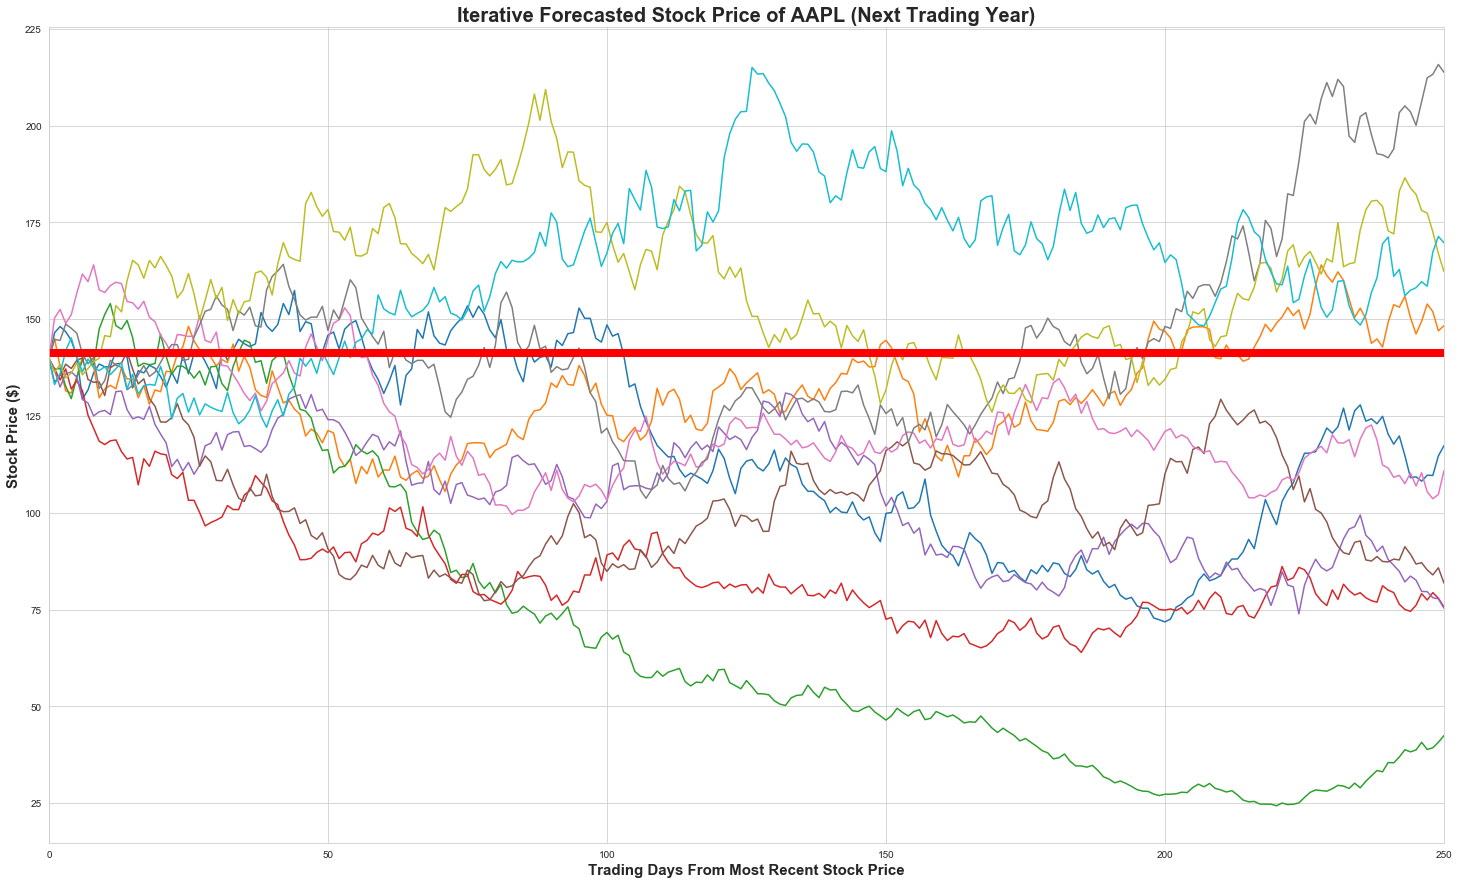

In [27]:
plt.figure(figsize = (25,15))
plt.title('Iterative Forecasted Stock Price of AAPL (Next Trading Year)', fontsize = 20, weight = 'bold')
plt.xlabel('Trading Days From Most Recent Stock Price', fontsize = 15, weight = 'bold')
plt.ylabel('Stock Price ($)', fontsize = 15, weight = 'bold')
plt.plot(s[:,:10])
plt.axhline(y = s.mean(), linewidth = 8, color = 'r')
plt.margins(x = 0)
plt.show()

In [28]:
s.mean()

141.2482059595434

# Forecasting the Price of a Call Option

> $\Large C = \frac{e^{-rT} \cdot \sum{p_i}}{Iterations} $

In [29]:
p = np.maximum(s[-1] - 110, 0)
p

array([ 7.31038581, 38.31391929,  0.        , ...,  0.        ,
       34.25564225, 13.12657233])

In [30]:
p.shape

(10000,)

In [31]:
#Buy If S - K > 0

In [32]:
C = np.exp(-r1 * T1)*np.sum(p)/iterations2                      #= Call Option Price
C

40.90284163052225